# Autômato Finito e Conversão: AFN-AFD
---

# Sumário

1. [Modelo em JSON](#Modelo-Json)
1. [Símbolos usados](#Símbolos-usados)
1. [Construção de um AFD a partir de um AFN](#Construção-de-um-AFD-a-partir-de-um-AFN)
1. [Algoritmo em Python](#Algoritmo-em-Python)
    1. [1 - Carregar entrada (arquivo json)](#1---Carregar-entrada-(arquivo-json))


# Símbolos usados
- Delta - **δ**
- Epsilon - **ε**
- Conjunto Vazio = $\emptyset$
- o elemento pertence ao conjunto - **∈**
---

# Modelo Json

- Modelo ilustrativo:

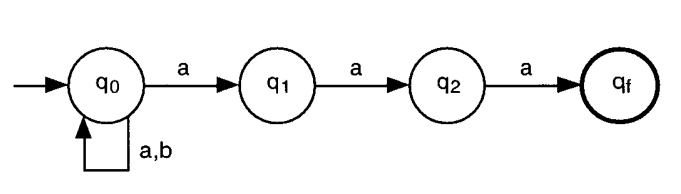

- Modelo em formato JSON:

```json
{
  "estados": ["q0", "q1", "q2", "qf"],
  "alfabeto": ["a", "b"],
  "estado_inicial": "q0",
  "estados_finais": ["qf"],
  "transicoes": {
    "q0": {"a":["q0", "q1"], "b":["q0"]},
    "q1": {"a":["q2"], "b":[]},
    "q2": {"a":["qf"], "b":[]},
    "qf": {"a":[], "b":[]}
  }
}
```

# Construção de um AFD a partir de um AFN

Considere o AFN **M = ({a, b}, {q0, q1, q2, 1f}, δ, q0, {qf})**. O correspondente AFD **M' = ({a,b}, Q', δ', q0, F')** conforme a prova de equivalência, é como segue:

- Q' = {<$q_0$>, <$q_1$>, <$q_2$>, <$q_f$>, <$q_0q_1$>, <$q_0q_2$>, ..., <$q_0q_1q_2q_f$>}
- F' = <$q_f$>, <$q_0q_f$>, <$q_1q_f$>, ..., <$q_0q_1q_2q_f$>}
- δ' é tal que (na tabela que seque são explicitados somente os estados para quais a função programa é definida):

| $\delta$         | a                | b        | 
| :---:            | :---:            | :---:    | 
| <$q_0$>          | <$q_0q_1$>       | <$q_0$>  | 
| <$q_1q_2$>       | <$q_0q_1q_2$>    | <$q_0$>  |
| <$q_0q_1q_2$>    | <$q_0q_1q_2q_f$> | <$q_0$>  |
| <$q_0q_1q_2q_f$> | <$q_0q_1q_2q_f$> | <$q_0$>  |

O grafo que representa M' é ilustado na figura abaixo:

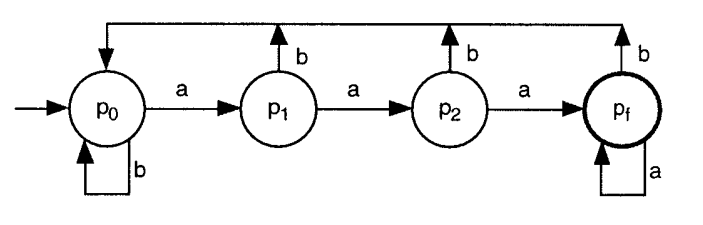

# Algoritmo em Python

### 1 - Carregar entrada (arquivo json)

In [1]:
import json
import pandas as pd
import re

In [2]:
with open("../data/raw/AFN.json", "r") as f:
    data = json.load(f)

In [3]:
df_transicoes = pd.DataFrame(data["transicoes"]).T
df_transicoes

,a,b
q0,"[q0, q1]",[q0]
q1,[q2],[]
q2,[qf],[]
qf,[],[]


### 2- Função geradora de estados *$p_i$*

- Criando caminho lógico para a conversão:

In [12]:
# Para q0 => q0q1 de uma transição a
p1 = tuple(df_transicoes.T["q0"]["a"])
p1

('q0', 'q1')

In [13]:
# Criação do conjunto de estados 'pi'
_pi_ = set()
_pi_.add(p1)
_pi_

{('q0', 'q1')}

In [14]:
# Verificação de estado existente no conjunto 'pi'
p1 in _pi_

True

In [15]:
# Reinciando o conjunto
_pi_ = set()
_pi_.add(p1)
_pi_

# Buscando estados próximos para p1
for pi in _pi_.copy(): # Percorrer a copia do conjunto 'pi' para evitar conflitos de interação
    novo_pi = set()
    for s in pi:
        qiqu = set(df_transicoes.T[s]["a"])
        novo_pi = novo_pi.union(qiqu)
    
    print(novo_pi)

    # Para fins de identidade, antes da tupla, criar uma lista e ordenar
    novo_pi_l = list(novo_pi)
    novo_pi_l.sort()
    print(novo_pi_l)

    # Criação da tupla, variável imutável
    novo_pi = tuple(novo_pi_l)
    print(novo_pi)

    # Adicionar ao conjunto 'pi'
    _pi_.add(novo_pi)

_pi_

{'q1', 'q2', 'q0'}
['q0', 'q1', 'q2']
('q0', 'q1', 'q2')


{('q0', 'q1'), ('q0', 'q1', 'q2')}

- Criação do metodo gera $p_i$

In [16]:
def gera_pi(pi, transicao): # Ex.: ('q0',)

    novo_pi = set()
    
    for estado in pi:
        qiqu = set(df_transicoes.T[estado][transicao])
        novo_pi = novo_pi.union(qiqu)

    novo_pi_l = list(novo_pi)
    novo_pi_l.sort()

    novo_pi = tuple(novo_pi_l)

    return novo_pi

- Testes isolados

In [17]:
p0 = ('q0',)
p1 = ('q0', 'q1',)
p2 = ('q0', 'q1', 'q2',)
pf = ('q0', 'q1', 'q2', 'qf',)

In [18]:
gera_pi(p0, 'a')

('q0', 'q1')

In [19]:
gera_pi(p0, 'b')

('q0',)

In [20]:
gera_pi(p1, 'a')

('q0', 'q1', 'q2')

In [21]:
gera_pi(p1, 'b')

('q0',)

In [22]:
gera_pi(p2, 'a')

('q0', 'q1', 'q2', 'qf')

In [23]:
gera_pi(pf, 'a')

('q0', 'q1', 'q2', 'qf')

In [24]:
gera_pi(pf, 'b')

('q0',)

- Gerando conjunto de transições $p_i$

In [25]:
def gera_transicoes(pi, pilha=None, novas_transicoes=None):
   
    if pilha is None:
        pilha = set()

    if novas_transicoes is None:
        novas_transicoes = {}
        
    if pi in pilha:
        return novas_transicoes
    else:
        pilha.add(pi)
        
    novas_transicoes[pi] = {}
    for transicao in df_transicoes.T.index.to_list():
        novo_pi = gera_pi(pi, transicao)
        novas_transicoes[pi][transicao] = novo_pi
        gera_transicoes(novo_pi, pilha, novas_transicoes)

    return novas_transicoes    

A função **gera_transicoes** só necessita de uma chamada com o estado incial de M' ($q_0$), as varáveis com incialização padrão representam:
- *pilha*: armazena em um conjunto, todos os novos estados <$q_0q_1...q_n$> e evitando repetições;
- *novas_transicoes*: é um dicionário que cria o objeto para representar $\delta'$

In [26]:
estado_inicial = ('q0',)
nt = gera_transicoes(estado_inicial)
nt

{('q0',): {'a': ('q0', 'q1'), 'b': ('q0',)},
 ('q0', 'q1'): {'a': ('q0', 'q1', 'q2'), 'b': ('q0',)},
 ('q0', 'q1', 'q2'): {'a': ('q0', 'q1', 'q2', 'qf'), 'b': ('q0',)},
 ('q0', 'q1', 'q2', 'qf'): {'a': ('q0', 'q1', 'q2', 'qf'), 'b': ('q0',)}}

- Criando Dataframe a partir das novas transições:

In [27]:
# Lendo o dicionário
for index, value in nt.items():
    print(index)
    for transicao, estado in value.items():
        print(f"\t{transicao} = {estado}")

('q0',)
	a = ('q0', 'q1')
	b = ('q0',)
('q0', 'q1')
	a = ('q0', 'q1', 'q2')
	b = ('q0',)
('q0', 'q1', 'q2')
	a = ('q0', 'q1', 'q2', 'qf')
	b = ('q0',)
('q0', 'q1', 'q2', 'qf')
	a = ('q0', 'q1', 'q2', 'qf')
	b = ('q0',)


In [28]:
# Função que faz a redução de '('q0', 'q1')' => 'q0q1'
ct = lambda s: re.sub(r"[()',\s]", "", str(s))

# DataFrame criando a partir de um novo objeto reduzido e válido
df_nova_transicoes = pd.DataFrame.from_dict({
    
    ct(index): {
        transicao: ct(estado)            
        
        for transicao, estado in value.items()
    }
    
    for index, value in nt.items()
    
}, orient="index")

df_nova_transicoes

,a,b
q0,q0q1,q0
q0q1,q0q1q2,q0
q0q1q2,q0q1q2qf,q0
q0q1q2qf,q0q1q2qf,q0


- Tradução dos estados tipo <$q_0q_1..qn$> para <$p_i$>

In [29]:
# Verifica se tem algum estado final (Ex,: 'qf') que pertence ao estado 'q0qf'
[qf in 'q0qf' for qf in data["estados_finais"]]

[True]

In [30]:
# Se pelo menos algum estado final pertencer, ele será um estado final
any([False, False, True, False])

True

In [31]:
# Dicionário para tradução dos novos estados
dtraduz = {
    estado: f"p{i}*" if any([qf in estado for qf in data["estados_finais"]]) else f"p{i}"
    for i, estado in enumerate(df_nova_transicoes.index.to_list())
}
dtraduz

{'q0': 'p0', 'q0q1': 'p1', 'q0q1q2': 'p2', 'q0q1q2qf': 'p3*'}

In [32]:
AFD_transicoes = df_nova_transicoes.rename(index=dtraduz).replace(dtraduz)
AFD_transicoes

,a,b
p0,p1,p0
p1,p2,p0
p2,p3*,p0
p3*,p3*,p0


### 3 - Salvando modelo final (AFD)

In [33]:
# Recuperando estados finais
AFD_estados_finais = [estado for _, estado in dtraduz.items() if '*' in estado]
AFD_estados_finais

['p3*']

In [34]:
# Montando modelo por partes
data_novo = data.copy()
data_novo["estados"] = AFD_transicoes.index.to_list()
data_novo["estado_inicial"] = AFD_transicoes.index[0]
data_novo["estados_finais"] = AFD_estados_finais
data_novo["transicoes"] = AFD_transicoes.T.to_dict()
data_novo

{'estados': ['p0', 'p1', 'p2', 'p3*'],
 'alfabeto': ['a', 'b'],
 'estado_inicial': 'p0',
 'estados_finais': ['p3*'],
 'transicoes': {'p0': {'a': 'p1', 'b': 'p0'},
  'p1': {'a': 'p2', 'b': 'p0'},
  'p2': {'a': 'p3*', 'b': 'p0'},
  'p3*': {'a': 'p3*', 'b': 'p0'}}}

In [35]:
# Salvar o JSON
with open("../data/processed/AFD.json", "w") as f:
    json.dump(data_novo, f, indent=4)